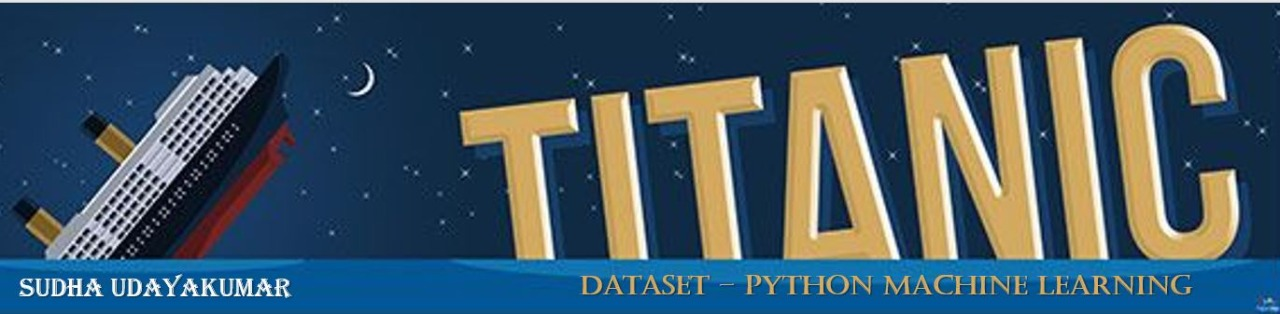

# Titanic Dataset- Python ML- Sudha Udayakumar

# Introduction (Problem Statement)

# Choose Right Tools

## Importing and Installing Right Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling Warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading Dataset

In [3]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [5]:
#save the CSV file to a local folder, so that we can use it while uploading to Github & Then commentig it out 
#df.to_csv("titanic.csv")

# Initial Analysis of Data

In [6]:
# to have a quick glance of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


<span style='background:yellow'>Observation: The data is loading properly and we can see the various columns and target variable (Survivied) </span>

In [7]:
df.shape

(891, 12)

<span style='background:yellow'>Observation: There are 891 rows and 12 columns, including the target column  </span>

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<span style='background:yellow'>Observation: There are 5 Object columns,which we need to convert(encoding) before model building  </span>

In [13]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<span style='background:yellow'>Observation:Survived is our target variable and it has only 2. So we can use Logistic Regression apart from other classification types  </span>

In [14]:
df["Survived"].value_counts().sort_index()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df["Survived"].value_counts(normalize=True)*100

0   61.62
1   38.38
Name: Survived, dtype: float64

<span style='background:yellow'>Observation: We can see from the above 2 value_counts, the data is split 61% & 38%, which is a balanced dataset </span>

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style='background:yellow'>Observation: There are missing values like embarked, age and cabin. we would need to handle them. The dataset is already small, so we cant drop rows. However the column cabin, is got a lot of missing values, so we might need to drop it. </span>
	

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


<span style='background:yellow'>Observation:Will passenger id be needed, I dont think so. So another column to drop. Age we already knew we had missing data, and still it is close to normal distribution (mean almost equivalent to median). The fare is different as expected, coz fare cant be same. parch, yes is different coz not every passenger will be travelling with kids  </span>


# Pre-processing of Data

## Handling Missing Values in Columns

In [24]:
df_new=df
df_new.head()
#creating a new DF copy, so that in case we want to work on the original dataframe, we can ..

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [25]:
df_new.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<span style='background:yellow'>Observation: 891 unique values for PassengerID and Name. They will not contribute to our data modeling, so lets drop PassengerId and Name. Ticket also has 681, they dont contribute to the data, as it is not going to help us if a passenger survival or not. So lets drop Ticket column as well </span>

In [26]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style='background:yellow'>Observation:Cabin is missing 687 data, so we cant replace it as well, so lets drop Cabin Column. And lets handle Embarked & Age missing values  </span>

### Handling Embarked Column

In [36]:
# Finding the distribution of Embarked across unique values
df_new.groupby(['Embarked'])['Embarked'].count()


Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [43]:
# Finding the mode of Embarked
#Since this is a classification column, we need to find the Mode of the column to replace the null values
df_new.Embarked.mode()

0    S
dtype: object

In [41]:
# Filling Null values of Embarked with its mode
df.Embarked = df.Embarked.fillna(df['Embarked'].mode()[0])

In [42]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<span style='background:yellow'>Observation:Now we can see that Embarked Column has no missing values, lets handle age column next  </span>

### Handling Age column

In [44]:
df_new.Age.fillna(df_new.Age.median(), inplace = True)


In [45]:
df_new.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<span style='background:yellow'>Observation:Now we can see that Age Column has no missing values, and all are missing values are handled  </span>

## Feature Engineering

In [47]:
# Creating a new feature/column : "Family Size". By adding SibSp and Parch. This will merge 2 columns as one
df_new['FamilySize'] = df_new['SibSp'] + df_new['Parch']+1

In [48]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.28,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,1


In [50]:
df_new.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
FamilySize       9
dtype: int64

<span style='background:yellow'>Observation: We have removed 2 columns and combined as 1, so we have a new column FamiySize and it has 9 unique values </span>

In [52]:
df["FamilySize"].value_counts().sort_index()

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: FamilySize, dtype: int64

<span style='background:yellow'>Observation: This shows the majority were single travellers and big family with 11 & 8 are least </span>

# Dropping Columns

In [55]:
df_new.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

In [53]:
drop_cols = ['Name','Ticket','SibSp','Parch','Cabin','PassengerId']

<span style='background:yellow'>Observation: drop_cols are the columns that we are goind to drop. Lets re-cap them whey we are dropping them  </span>

In [57]:
df_new.drop(drop_cols, axis = 1, inplace=True)


In [58]:
df_new.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.00,7.25,S,2
1,1,1,female,38.00,71.28,C,2
2,1,3,female,26.00,7.92,S,1
3,1,1,female,35.00,53.10,S,2
4,0,3,male,35.00,8.05,S,1
5,0,3,male,28.00,8.46,Q,1
6,0,1,male,54.00,51.86,S,1
7,0,3,male,2.00,21.07,S,5
8,1,3,female,27.00,11.13,S,3
9,1,2,female,14.00,30.07,C,2


<span style='background:yellow'>Observation:All the columns are handled and dropped as needed.  </span>

# EDA

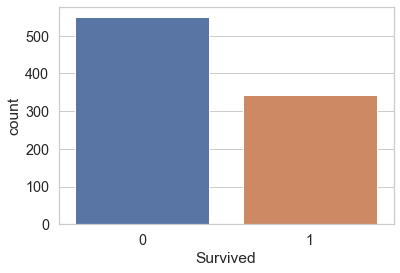

In [60]:
sns.countplot(df_new["Survived"])

In [64]:
# how many people survived
df_new['Survived'].sum()

342

In [65]:
df_new.shape[0]

891

In [66]:
# % of people survived
df_new['Survived'].sum()/df_new.shape[0]

0.3838383838383838

<span style='background:yellow'>Observation:342 people have survived that is 38% of people have only survivied  </span>

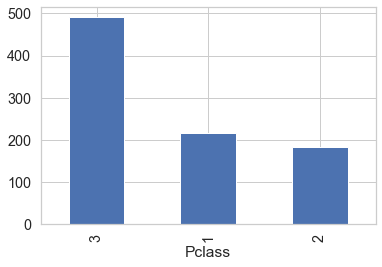

In [69]:
# How many people stayed in each of the classes
df_new.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False).plot(kind='bar')

<span style='background:yellow'>Observation:MOre people stayed in Class3  </span>

In [70]:
df_new.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'], dtype='object')

Text(0.5, 1.0, 'Pclass vs Survived')

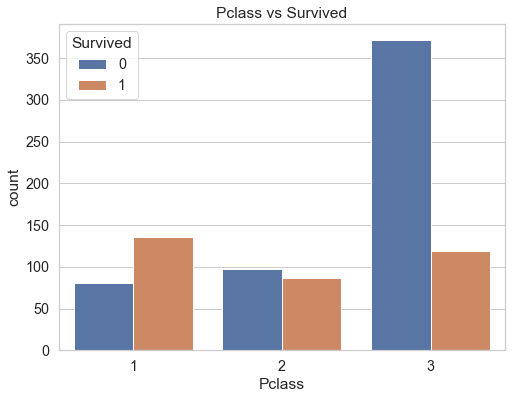

In [72]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df_new,x = 'Pclass', hue='Survived')
plt.title('Pclass vs Survived')

<span style='background:yellow'>Observation: Highest number of deaths was in 3rd class. More people survived from 1st class </span>

Text(0.5, 1.0, 'Sex vs Survived')

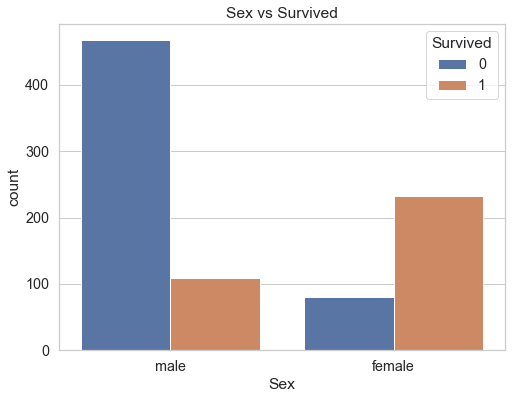

In [73]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df_new,x = 'Sex', hue='Survived')
plt.title('Sex vs Survived')

<span style='background:yellow'>Observation: More men died than women. The reverse of Female surviving more is also seen  </span>

Text(0.5, 1.0, 'Age vs Survived')

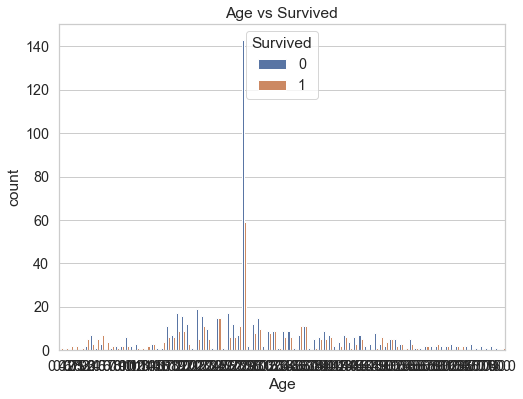

In [78]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df_new,x = 'Age', hue='Survived')
plt.title('Age vs Survived')

<span style='background:yellow'>Observation:This chart is not very clear, we will have to do it in bins, and check again  </span>

Text(0.5, 1.0, 'Embarked vs Survived')

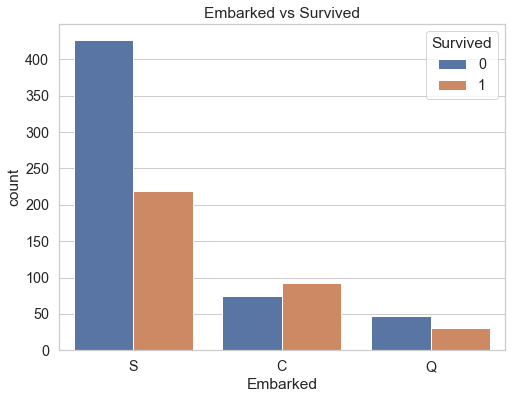

In [79]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df_new,x = 'Embarked', hue='Survived')
plt.title('Embarked vs Survived')

In [80]:
df_new['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<span style='background:yellow'>Observation:More people have died from "S" embarkment, and survived from there as well"Embarkment" and we can also see that most people Embarked in "S", so that could be the reason as well </span>

Text(0.5, 1.0, 'FamilySize vs Survived')

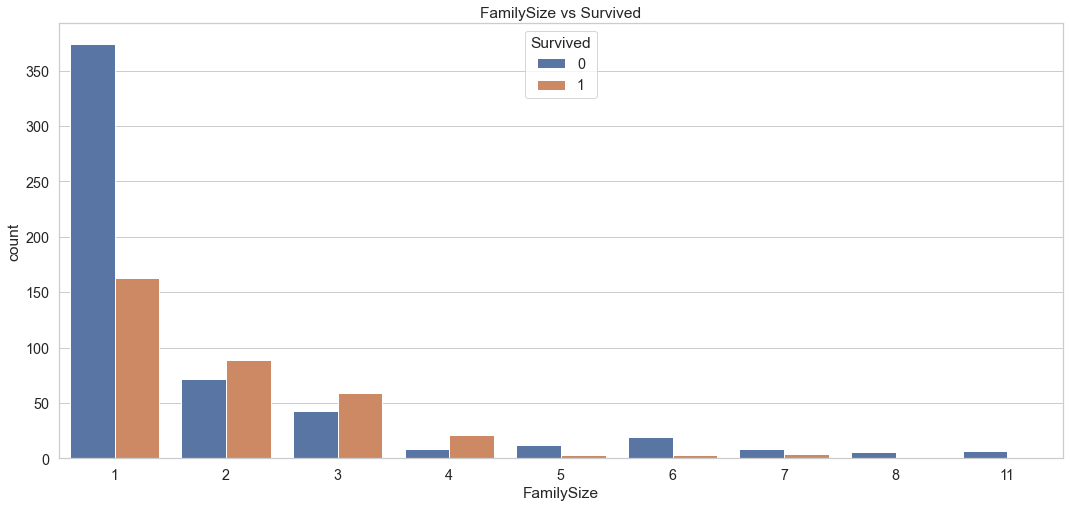

In [83]:
fig,ax =plt.subplots(figsize=(18,8))
sns.countplot(data = df_new,x = 'FamilySize', hue='Survived')
plt.title('FamilySize vs Survived')

<span style='background:yellow'>Observation: We already saw there more single travelers,so the survived and dead columns are the highest. However its very sad to see the people with large famlies like 8 & 11, have not survivied </span>

# Age

In [84]:
df_new["Age"].value_counts(normalize=True,sort=True)*100

28.00   22.67
24.00    3.37
22.00    3.03
18.00    2.92
19.00    2.81
30.00    2.81
21.00    2.69
25.00    2.58
36.00    2.47
29.00    2.24
32.00    2.02
27.00    2.02
35.00    2.02
26.00    2.02
16.00    1.91
31.00    1.91
34.00    1.68
20.00    1.68
23.00    1.68
33.00    1.68
39.00    1.57
17.00    1.46
42.00    1.46
40.00    1.46
45.00    1.35
38.00    1.23
50.00    1.12
2.00     1.12
4.00     1.12
47.00    1.01
44.00    1.01
48.00    1.01
54.00    0.90
9.00     0.90
1.00     0.79
51.00    0.79
52.00    0.67
14.00    0.67
3.00     0.67
49.00    0.67
41.00    0.67
37.00    0.67
43.00    0.56
58.00    0.56
15.00    0.56
60.00    0.45
11.00    0.45
62.00    0.45
8.00     0.45
56.00    0.45
5.00     0.45
46.00    0.34
65.00    0.34
7.00     0.34
6.00     0.34
61.00    0.34
55.00    0.22
28.50    0.22
71.00    0.22
59.00    0.22
63.00    0.22
0.83     0.22
30.50    0.22
70.00    0.22
57.00    0.22
0.75     0.22
13.00    0.22
10.00    0.22
64.00    0.22
40.50    0.22
32.50    0.22
45.50 

<span style='background:yellow'>Observation: This was done to see the age ranges and the percentage. so that we can create bins as needed below  </span>

In [88]:
bins = [0.,10.,20.,30.,40.,50.,60.,70.,df['Age'].max()]
group_name = ["0","10","20","30","40","50","60","70"]
df_new['Age_bin'] = pd.cut(df['Age'],bins, labels = group_name)

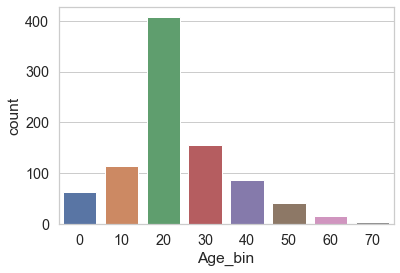

In [89]:
sns.countplot(df_new["Age_bin"])

<span style='background:yellow'>Observation: 20-30 is the highest population.   </span>

Text(0.5, 1.0, 'Age_bin vs Survived')

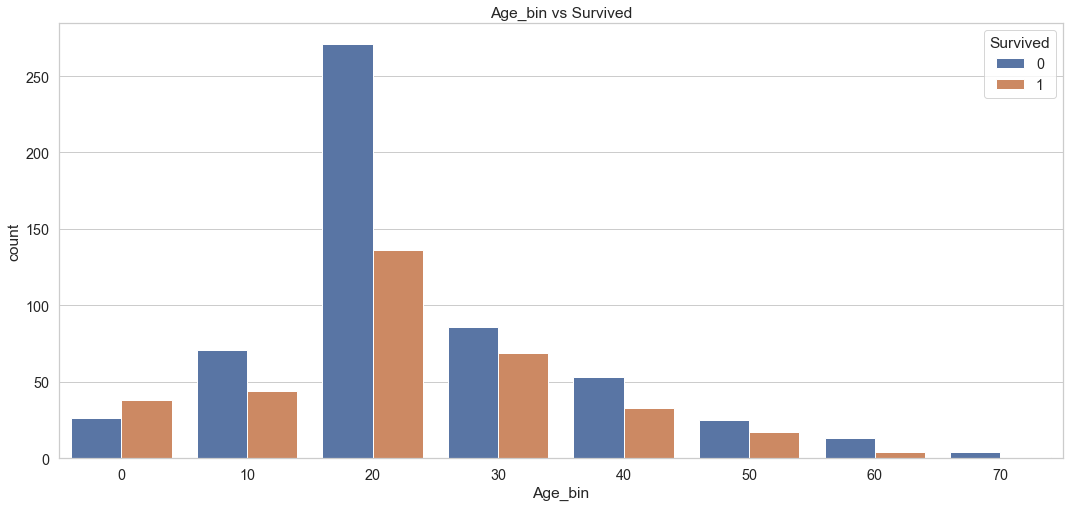

In [90]:
fig,ax =plt.subplots(figsize=(18,8))
sns.countplot(data = df_new,x = 'Age_bin', hue='Survived')
plt.title('Age_bin vs Survived')

<span style='background:yellow'>Observation: We can see that people from almost all groups have survivied except the senior Citizens, who couldnt survive the harsh conditions  </span>

# Label encoder

In [91]:
df_new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Age_bin
0,0,3,male,22.00,7.25,S,2,20
1,1,1,female,38.00,71.28,C,2,30
2,1,3,female,26.00,7.92,S,1,20
3,1,1,female,35.00,53.10,S,2,30
4,0,3,male,35.00,8.05,S,1,30


In [94]:
LE=LabelEncoder()
df_new["Sex"] = LE.fit_transform(df_new["Sex"])

In [100]:
df_new['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [96]:
df_new["Embarked"] = LE.fit_transform(df_new["Embarked"])

In [99]:
df_new['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

<span style='background:yellow'>Observation: "sex" and "Embarked" were the only columns that needed to be label encoded as they were classification data and it is done now </span>

# Model Building

## Importing Librariries for Model Building

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Splitting into Train & Test Data

In [102]:
x=df_new.drop(["Survived","Age_bin"]   ,axis=1)
x.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,22.00,7.25,2,2
1,1,0,38.00,71.28,0,2
2,3,0,26.00,7.92,2,1
3,1,0,35.00,53.10,2,2
4,3,1,35.00,8.05,2,1


In [104]:
y=df_new["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [106]:
y_train.value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [107]:
y_test.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [108]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

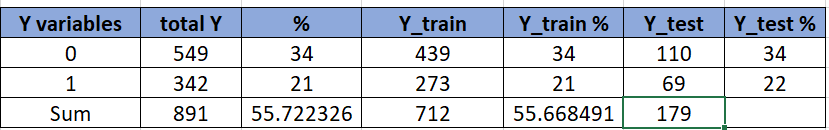

<span style='background:yellow'>Observation: since we used stratify, the 0 & 1 percentage is the same across, Y, Y_train and y_test  </span>

## Finding Best Random State

In [109]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i,stratify=y)
    
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",maxRs)

Best accuracy is  0.8305084745762712 on Random_state   15


<span style='background:yellow'>Observation: Let us use the best random state identified in our model building as needed </span>

# Instantiating the Model

In [112]:
# Since this is a Classification dataset, lets use the following Algos and instantiate them

lg=LogisticRegression()
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
sv=SVC()

## Model Building and Checking Evaluation Metrics

In [113]:
model=[lg,gnb,rf,ad,dtc,sv]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n Accuracy score: of ",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print("mean of cross val with scoring= accuarcy:",score.mean())
    print("***************************************")


 Accuracy score: of  LogisticRegression()
0.8033898305084746
[[157  25]
 [ 33  80]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       182
           1       0.76      0.71      0.73       113

    accuracy                           0.80       295
   macro avg       0.79      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295

[0.76536313 0.79213483 0.78651685 0.78651685 0.81460674]
mean of cross val with scoring= accuarcy: 0.7890276818780994
***************************************

 Accuracy score: of  GaussianNB()
0.7830508474576271
[[154  28]
 [ 36  77]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       182
           1       0.73      0.68      0.71       113

    accuracy                           0.78       295
   macro avg       0.77      0.76      0.77       295
weighted avg       0.78      0.78      0.78       295

[0.74301676 0.78651685 0.7

## Model Building and Evaluation Metrics Comparison

In [114]:
modelList=[("Log Reg", lg), ("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Support Vector",sv)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        modelAccuracy.append(accuracy)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Accuracy": modelAccuracy,
                         "CrossValidation":modelCrossval,
                          "Difference in Accuracy & CV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Accuracy,CrossValidation,Difference in Accuracy & CV
0,Log Reg,0.78,0.79,-0.01
1,Dec Tree Classifier,0.81,0.78,0.03
2,Random Forest Class,0.82,0.80,0.02
3,Naive Bayes-G,0.78,0.79,-0.01
4,Support Vector,0.67,0.67,-0.00


<span style='background:yellow'>Observation:The diff between accuracy and CV is lowest with Support Vector. However as an expection instead of going with the lowest diff, we can use RFC as it has the highest accuracy & CV score than Support Vecor. So we can go  with RFC for hyper parameter tuning </span>

# Hyper Parameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [120]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [122]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [124]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [126]:
mod=RandomForestClassifier(bootstrap= True, criterion='gini',max_depth=4,min_samples_leaf = 2, min_samples_split =8)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.8203389830508474


<span style='background:yellow'>Observation: Earlier with RandomForest cross validation it was at 80%, now it is at 82%, our hyperparameter tuning has improved the accuracy </span>

# Saving the Model

In [127]:
import joblib
joblib.dump(mod,"titanic.pkl")

['titanic.pkl']

# Loading the Model

In [128]:
model=joblib.load("titanic.pkl")

In [129]:
prediction=model.predict(x_test)

In [130]:
print(accuracy_score(y_test,pred))

0.8203389830508474


In [131]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [132]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

,0
0,1
1,1
2,1
3,0
4,1


In [133]:
prediction.to_csv('Titanic.csv') #saving the prediction

<span style='background:yellow'>Observation:  Save & Load the model. Saved the model and before handing over, just loaded & test the model to see if its working fine
    if the accuracy is the improved one and predictions are coming up. All were working fine </span>

# Summary 

Titanic Dataset

1. We had lot of pre-processing to do as there were missing values. We handled the missing values with mode & median
2. We then merged the family column and dropped the Cabin Column as it had more than 50% missing values
3. As we go to EDA, we found that Females survived more. 
4. Also we created Age bins to see the suvival rate. The senior citizens didnt survive much on the harsh conditions
5. Looks like first class people had more access to lifeboats than people in third class, as more First class people had survivied

Moving on to the Model Building

1. It was a balanced dataset,, however it was not 50:50, we used stratify for y_train and y_test to balance the test data
2. RFC was our best model choosen
3. With Hyper Parameter tuning, our model acccuracy on Cross validtion improved from 80 to 82 %